In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import warnings

warnings.filterwarnings('ignore')

def lstm_sliding_window_prediction(area: str):
    # 1. 創建模擬時間序列數據
    data = pd.read_csv(r"data\owid-covid-data.csv")

    # 選擇某一地區的數據進行分析，例如 "World"
    region_data = data[data['iso_code'] == area]
    region_data['new_cases'] = region_data['new_cases'].fillna(0)  # 填充缺失值

    # 可視化原始數據
    # plt.figure(figsize=(20, 6))
    # plt.plot(region_data['date'], region_data['new_cases'])
    # plt.title('Daily New COVID Cases (World)')
    # plt.xlabel('Date')
    # plt.ylabel('New Cases')
    # plt.xticks(rotation=45)
    # plt.show()

    # 2. 數據預處理
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(region_data['new_cases'].values.reshape(-1, 1))

    # 使用移動窗格創建時間序列數據集
    def create_sliding_window_dataset(data, window_size=10):
        X, y = [], []
        for i in range(len(data) - window_size):
            X.append(data[i:i + window_size, 0])
            y.append(data[i + window_size, 0])
        return np.array(X), np.array(y)

    # 定義窗口大小
    window_size = 28

    # 創建滑動窗口數據集
    X, y = create_sliding_window_dataset(scaled_data, window_size)

    # 重塑 X 為 LSTM 的輸入格式 (樣本數, 時間步長, 特徵數)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # 分割為訓練集和測試集
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # 3. 構建 LSTM 模型
    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(window_size, 1)),
        Dropout(0.2),
        LSTM(units=50, return_sequences=False),
        Dropout(0.2),
        Dense(units=1)  # 單一輸出值
    ])

    # 編譯模型
    model.compile(optimizer='adam', loss='mean_absolute_error')

    # 4. 訓練模型
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    # 5. 預測並還原預測結果
    predicted_cases = model.predict(X_test)
    predicted_cases = scaler.inverse_transform(predicted_cases)  # 還原縮放

    # 還原測試集實際值
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    # 6. 視覺化結果
    plt.figure(figsize=(20, 6))
    plt.plot(region_data['date'][-len(y_test_actual):], y_test_actual, color='blue', label='Actual Cases')
    plt.plot(region_data['date'][-len(predicted_cases):], predicted_cases, color='red', label='Predicted Cases')
    plt.title('Sliding Window Prediction (New COVID Cases)')
    plt.xlabel('Date')
    plt.ylabel('New Cases')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    # 7. 評估模型
    from sklearn.metrics import mean_absolute_error, root_mean_squared_error
    print(f'MAE: {mean_absolute_error(y_test_actual, predicted_cases)}')
    print(f'MAE / Mean: {mean_absolute_error(y_test_actual, predicted_cases) / np.mean(y_test_actual)}')
    print(f'RMSE: {root_mean_squared_error(y_test_actual, predicted_cases)}')


In [1]:
regions=["MYS", "ARG", "MEX", "JPN", "CAN", "THA", "VNM", "TWN", "CHN", "SGP"]

Region: MYS
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


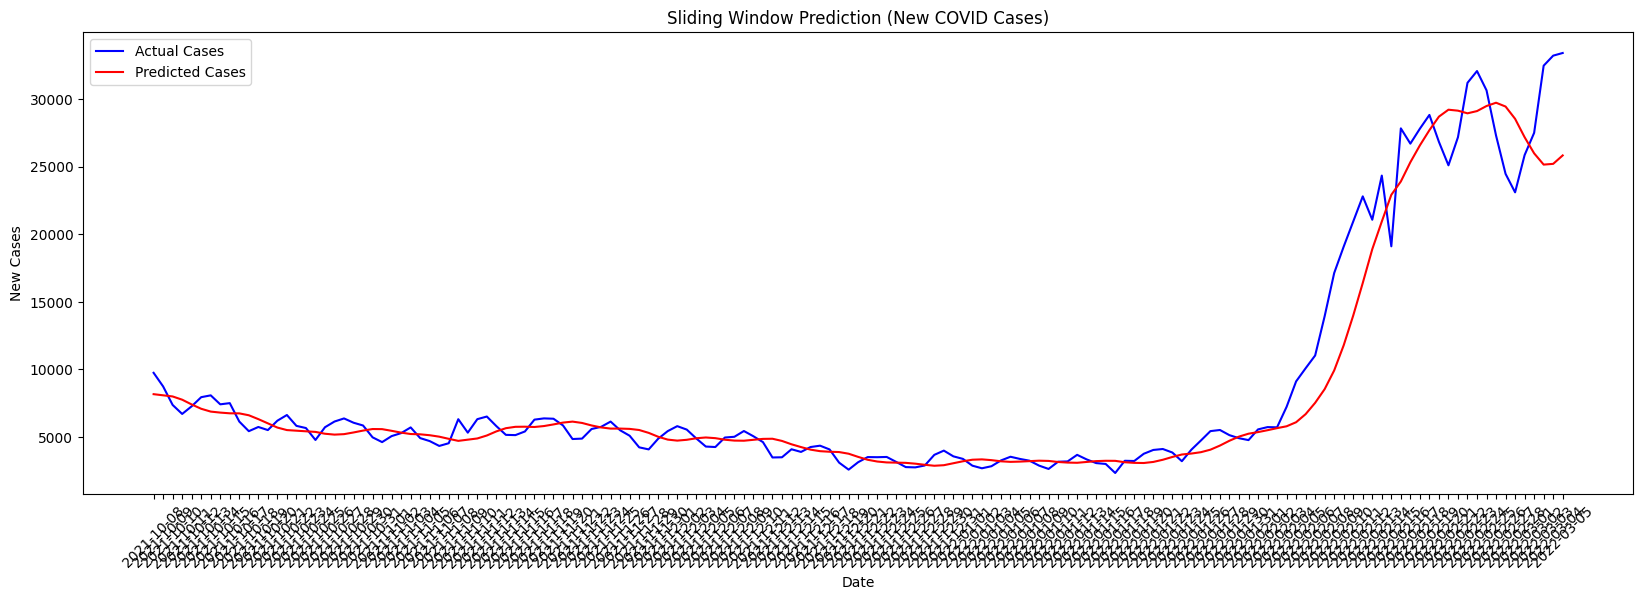

MAE: 1213.0830799077182
MAE / Mean: 0.14105121866818318
RMSE: 2077.694866044543
Region: ARG
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


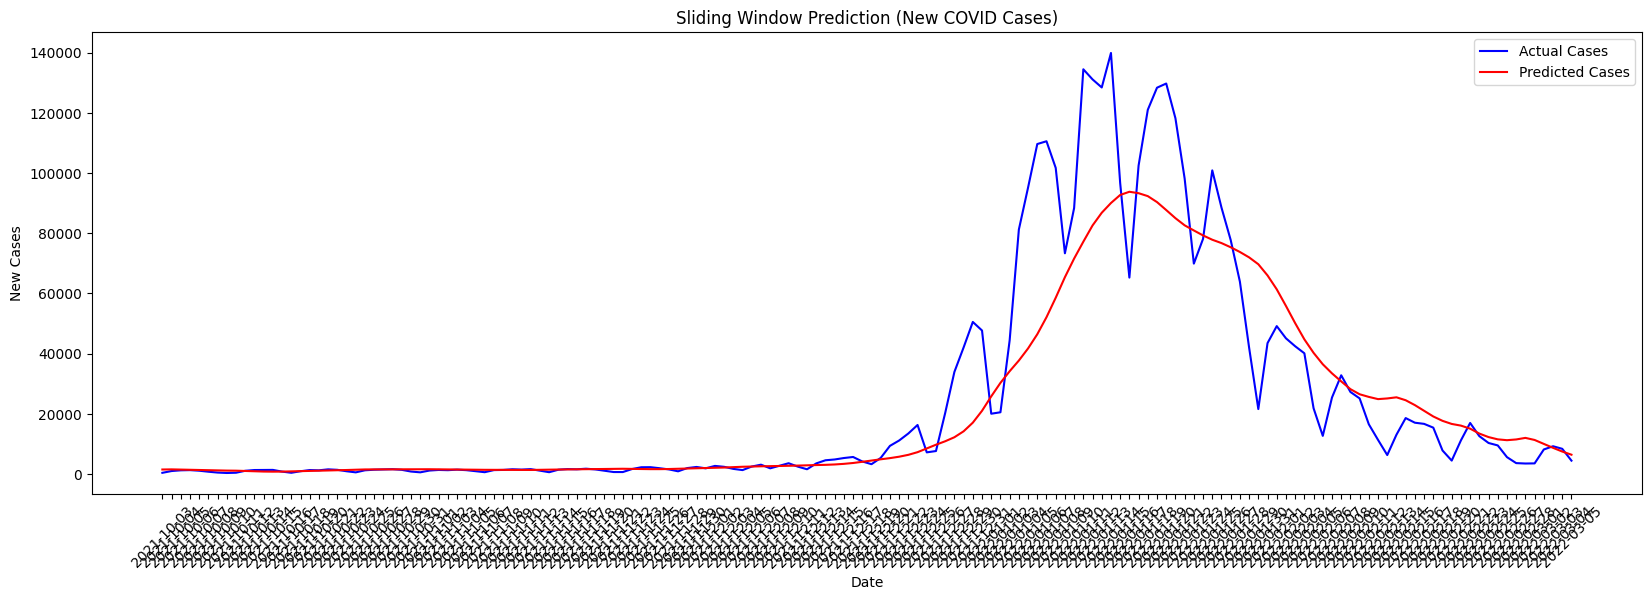

MAE: 8356.584522990437
MAE / Mean: 0.3501829716821354
RMSE: 16406.8851670751
Region: MEX
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000016584D49D80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


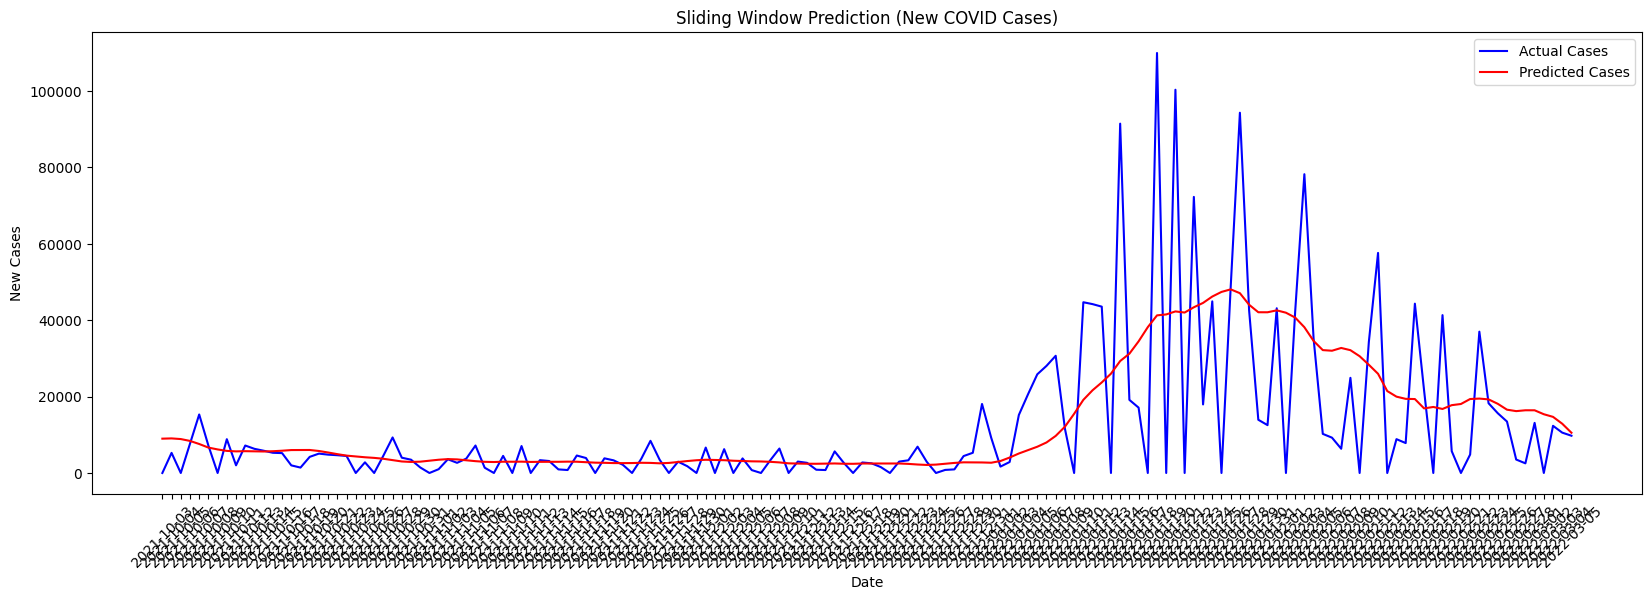

MAE: 9264.532025225752
MAE / Mean: 0.7607597327332691
RMSE: 16307.624420056267
Region: JPN
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


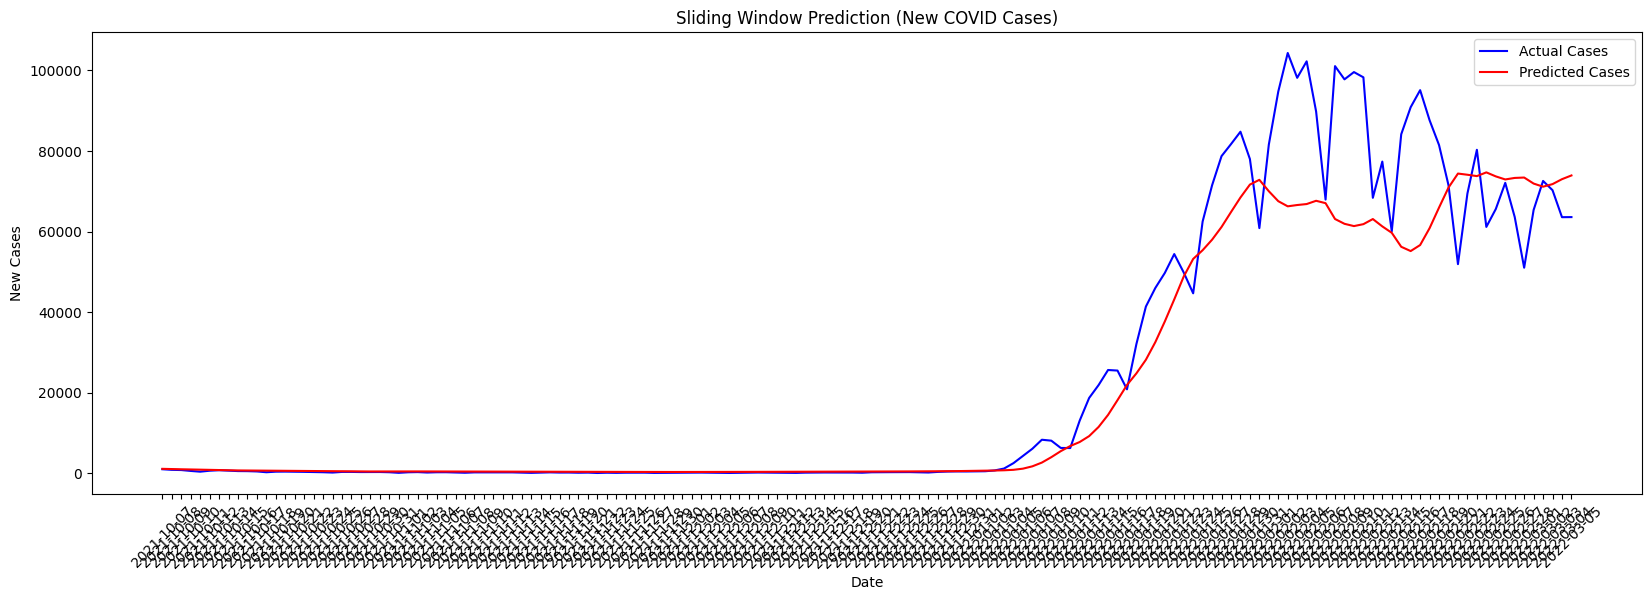

MAE: 5601.262654418945
MAE / Mean: 0.23146880356856608
RMSE: 11419.13910792188
Region: CAN
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


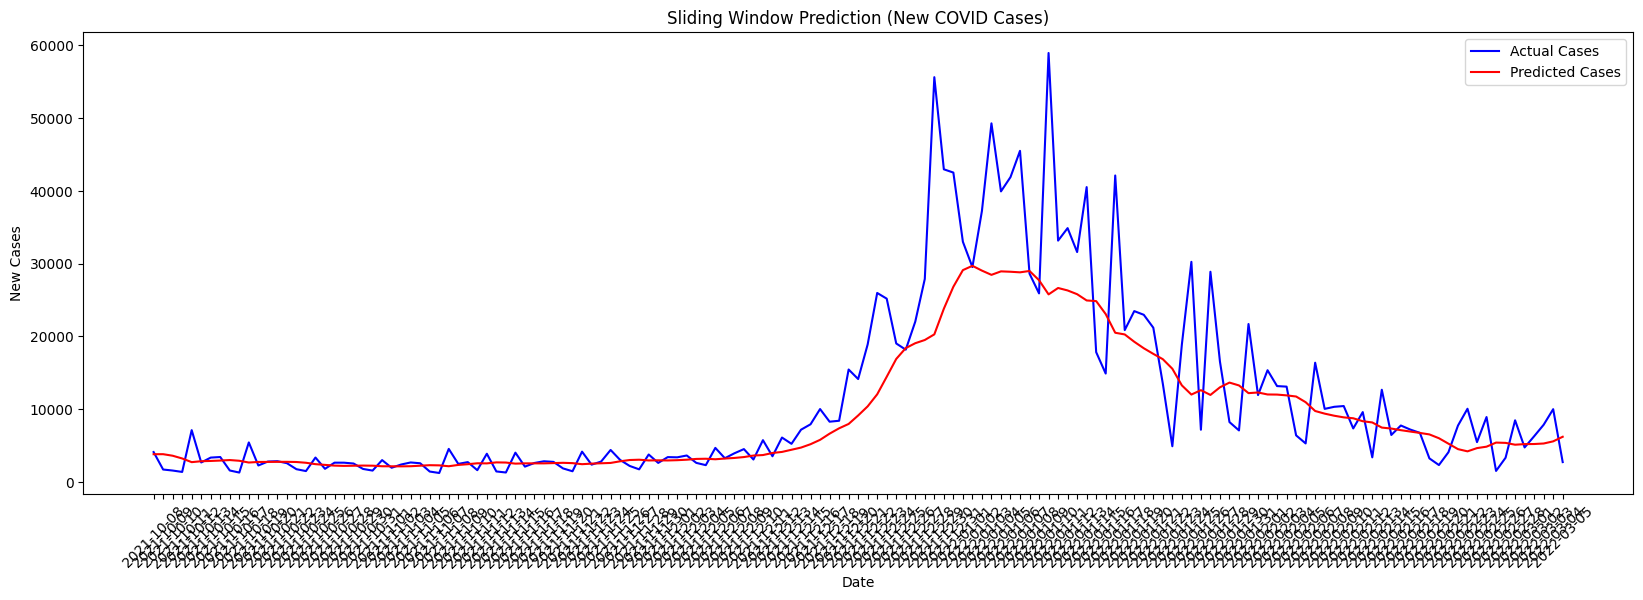

MAE: 3802.911762007131
MAE / Mean: 0.3377686027128736
RMSE: 6883.7387559975305
Region: THA
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


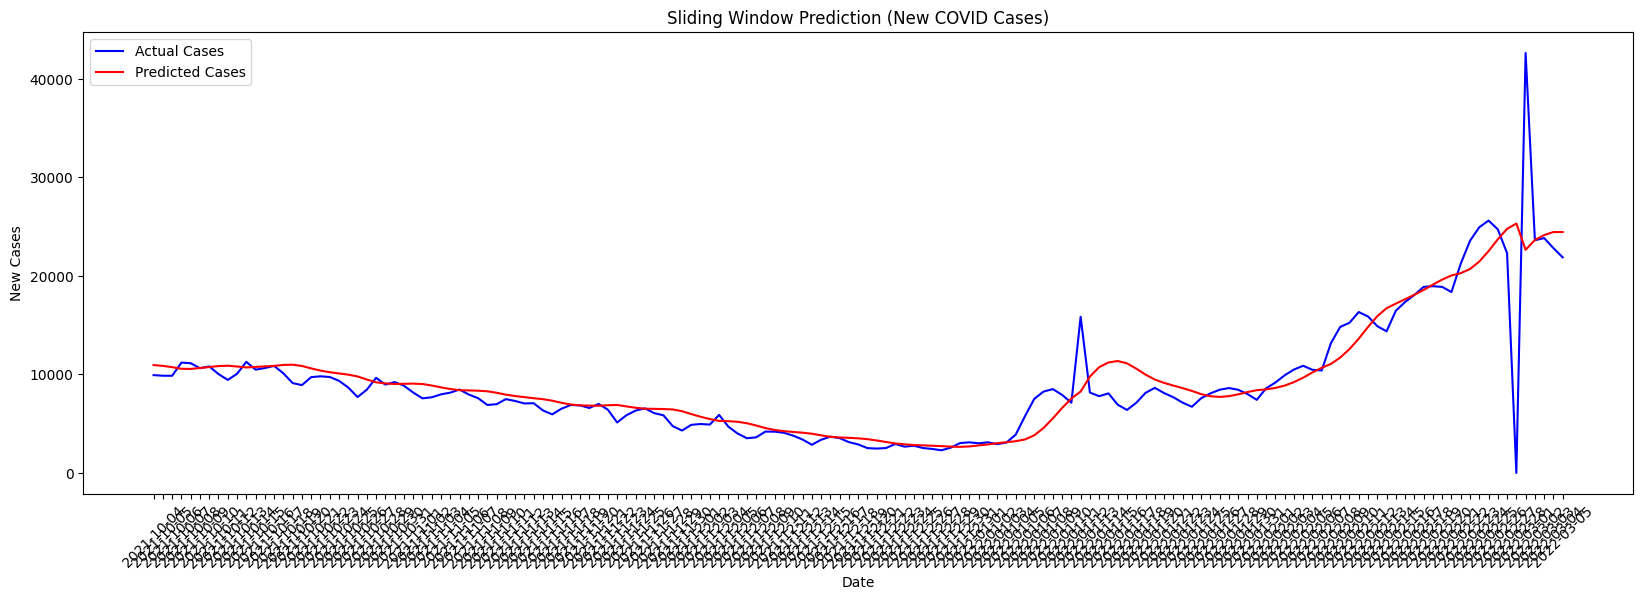

MAE: 1324.8622743693832
MAE / Mean: 0.14590752649319505
RMSE: 3009.8088857622192
Region: VNM
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


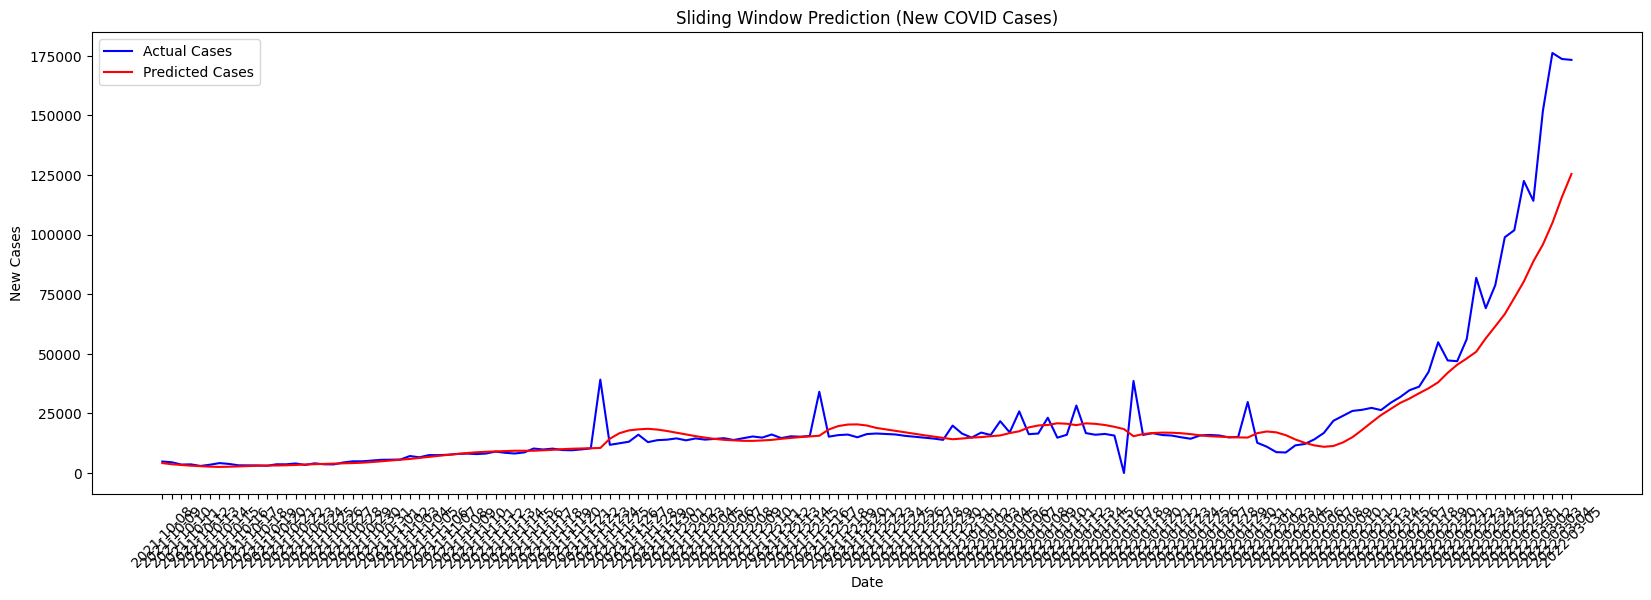

MAE: 5608.2117567638425
MAE / Mean: 0.24536151830860725
RMSE: 12583.692421505559
Region: TWN
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


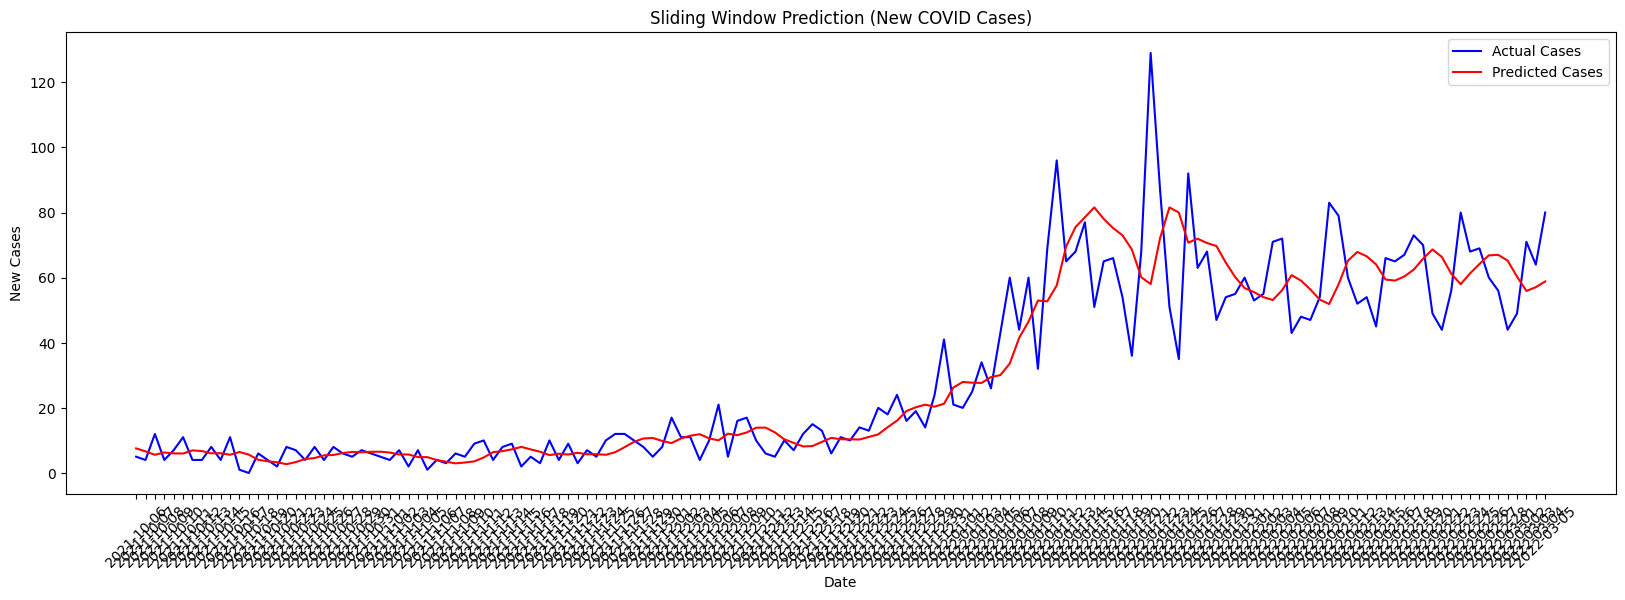

MAE: 8.018926634693777
MAE / Mean: 0.2670028493580508
RMSE: 12.57260152404487
Region: CHN
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


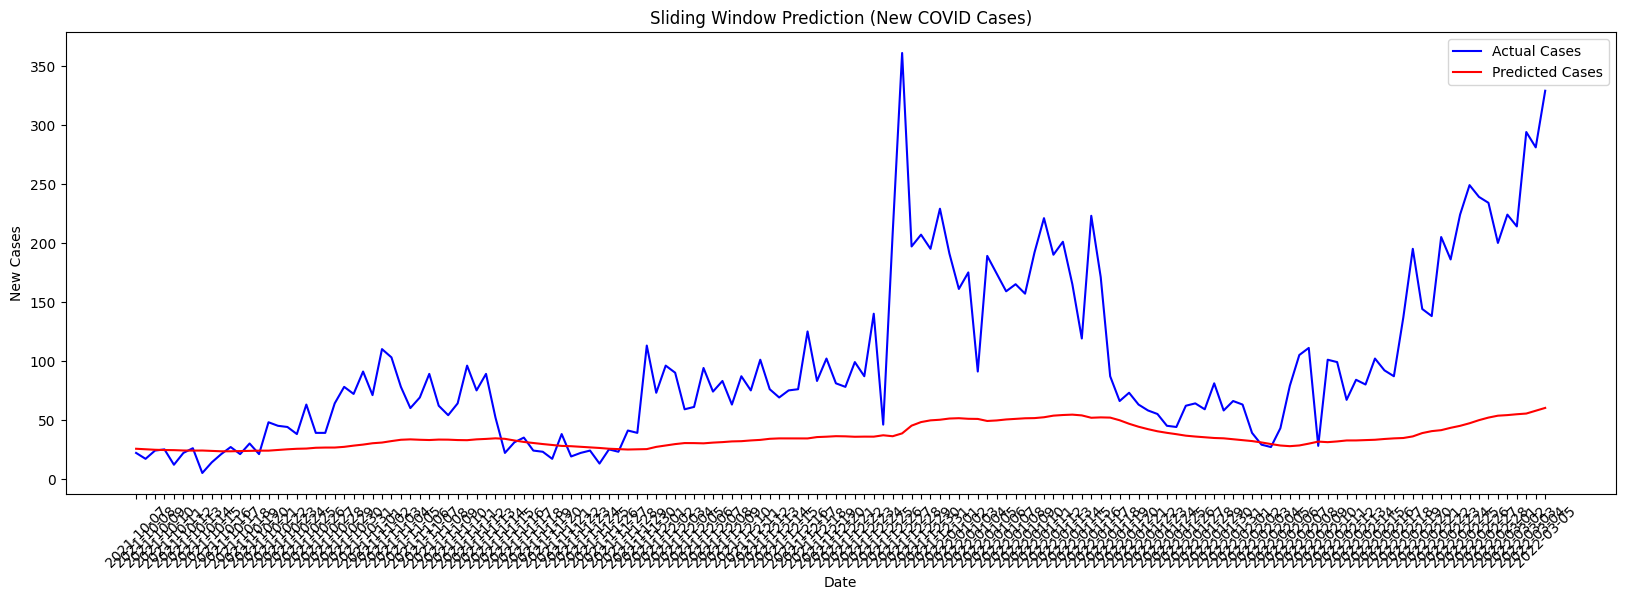

MAE: 62.99644421895345
MAE / Mean: 0.6502075712408324
RMSE: 88.7683214983992
Region: SGP
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step


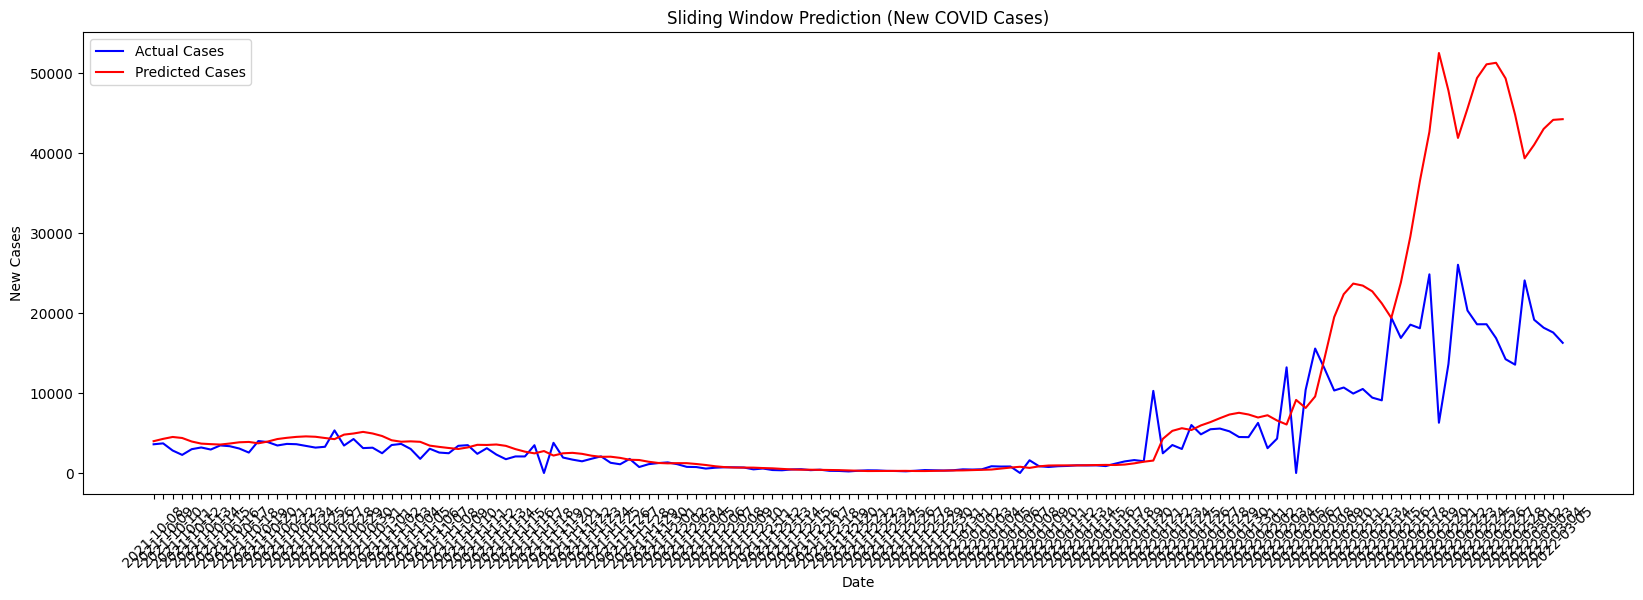

MAE: 4330.48656694041
MAE / Mean: 0.9181038938218766
RMSE: 9870.849832577407


In [3]:
for region in regions:
    print("=" * 50)
    print(f"Region: {region}")
    
    lstm_sliding_window_prediction(region)

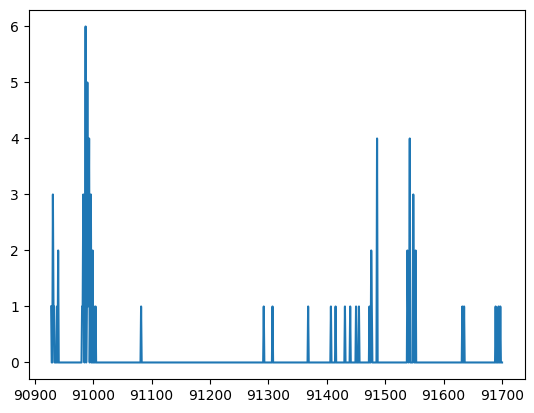

In [49]:
data = pd.read_csv(r"data\owid-covid-data.csv")
region_data = data[data['iso_code'] == "MAC"]
from matplotlib.pyplot import plot
plot(region_data["new_cases"])

In [51]:
region_data["new_cases"].describe()

count    773.000000
mean       0.104787
std        0.504529
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: new_cases, dtype: float64